In [213]:
import pandas as pd
import numpy as np

In [215]:
df = pd.read_csv("datasets/placement.csv")

In [216]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [218]:
df.isnull().any()

Unnamed: 0    False
cgpa          False
iq            False
placement     False
dtype: bool

In [219]:
# STEPS

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deplo the model

In [220]:
df = df.iloc[:, 1:]

In [221]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [222]:
import matplotlib.pyplot as plt

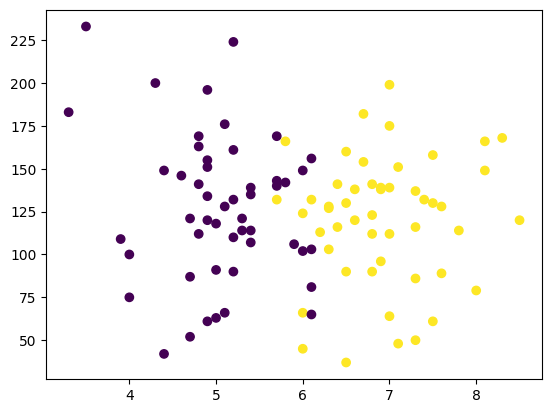

In [223]:
plt.scatter(df.cgpa, df.iq, c = df['placement'])

In [224]:
X = df.iloc[:, 0:2]
y = df.iloc[:, -1]

In [225]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [226]:
y.shape

(100,)

In [227]:
from sklearn.model_selection import train_test_split

In [251]:
# train_test_split(X, y, test_size=0.1)

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [230]:
X_train

,cgpa,iq
22,4.9,120.0
58,8.0,79.0
32,7.0,139.0
33,6.0,149.0
5,7.1,48.0
...,...,...
47,5.2,161.0
54,6.4,141.0
9,5.1,66.0
93,6.8,112.0


In [231]:
y_test

50    0
78    0
4     0
86    0
56    0
39    0
80    0
24    0
62    0
90    1
Name: placement, dtype: int64

In [232]:
from sklearn.preprocessing import StandardScaler

In [233]:
scaler = StandardScaler()

In [234]:
X_train_scaled  = scaler.fit_transform(X_train) 

In [235]:
X_train_scaled 

array([[-1.01986274, -0.07465447],
       [ 1.71611519, -1.14238694],
       [ 0.83354166,  0.42014839],
       [-0.04903186,  0.68057094],
       [ 0.92179902, -1.94969685],
       [ 0.83354166, -1.53302077],
       [ 0.12748284, -0.25695025],
       [-1.19637745, -0.93404889],
       [ 0.56876961,  1.53996537],
       [ 0.03922549,  0.86286673],
       [-1.01986274, -1.61114753],
       [-0.57857598,  0.42014839],
       [-1.1081201 , -0.28299251],
       [ 0.92179902,  0.73265545],
       [-0.84334804,  1.38371184],
       [ 1.18657108,  0.2378526 ],
       [-0.75509068,  2.63374009],
       [-1.81417892, -0.59549957],
       [ 1.36308578,  0.13368358],
       [ 1.80437254,  1.12328928],
       [-0.04903186,  0.02951456],
       [ 0.65702696, -0.85592213],
       [-0.93160539, -1.55906302],
       [-0.31380392,  0.44619064],
       [ 0.65702696,  0.0034723 ],
       [-1.01986274,  0.73265545],
       [ 0.83354166,  1.35766958],
       [ 1.36308578, -0.88196438],
       [-0.93160539,

In [236]:
X_test_scaled  = scaler.fit_transform(X_test) 

In [237]:
X_test_scaled

array([[-1.89220239,  2.06845659],
       [ 0.6835705 , -0.98402304],
       [ 0.38636593,  0.24098523],
       [-0.30711138, -0.04016421],
       [ 0.6835705 , -1.30533668],
       [-0.80245232,  0.32131364],
       [-0.50524776,  1.32541879],
       [-0.70338413, -0.18073893],
       [ 0.58450231, -0.56229888],
       [ 1.87238875, -0.88361252]])

In [238]:
from sklearn.linear_model import LogisticRegression 

In [239]:
clf = LogisticRegression()

In [240]:
clf.fit(X_train_scaled, y_train)

LogisticRegression()

In [241]:
y_pred = clf.predict(X_test_scaled)
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [242]:
y_test

50    0
78    0
4     0
86    0
56    0
39    0
80    0
24    0
62    0
90    1
Name: placement, dtype: int64

In [243]:
from sklearn.metrics import accuracy_score

In [244]:
accuracy_score(y_test, y_pred)

0.6

In [245]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

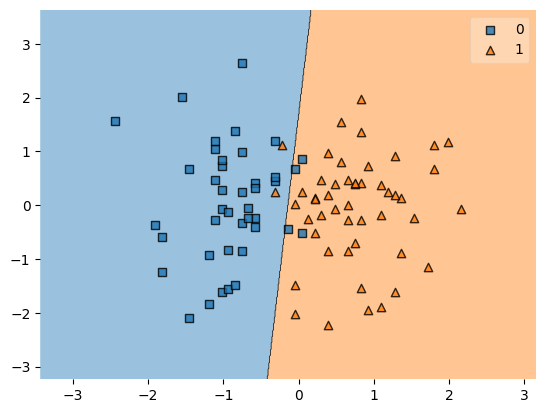

In [246]:
plot_decision_regions(X_train_scaled, y_train.values, clf=clf, legend = 1)

In [247]:
import pickle

In [249]:
pickle.dump(clf, open('output/model.pkl','wb'))